In [265]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json

# Gather

### 1- twitter-archive

In [266]:
# read file 'twitter-archive-enhanced.csv'
df_arcv = pd.read_csv('twitter-archive-enhanced.csv')

In [392]:
df_arcv.shape

(2356, 17)

### 2- image-predictions

In [268]:
# Download image_predictions.tsv
# Save file to workspace
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [269]:
# Read image_predictions file
df_img = pd.read_csv('image_predictions.tsv', sep='\t')

In [270]:
df_img.shape

(2075, 12)

### 3- twitter api

- I commented code below because connection failed

In [271]:
#import tweepy
#from tweepy import OAuthHandler
#from timeit import default_timer as timer

## Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
## These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
## df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
## change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
## NOTE TO REVIEWER: this student had mobile verification issues so the following
## Twitter API code was sent to this student from a Udacity instructor
## Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_arcv.tweet_id.values
#len(tweet_ids)

## Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
## Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    ## This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
    #    count += 1
    #    print(str(count) + ": " + str(tweet_id))
    #    try:
    #        tweet = api.get_status(tweet_id, tweet_mode='extended')
    #        print("Success")
    #        json.dump(tweet._json, outfile)
    #        outfile.write('\n')
    #    except tweepy.TweepError as e:
    #        print("Fail")
    #        fails_dict[tweet_id] = e
    #        pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [272]:
# Access to twitter API failed 

In [273]:
# Open tweet-json.txt file, the create dataframe
tweet_json = []
with open('tweet_json.txt') as file:
    for jsonline in file:
        try:
            tweetLine = json.loads(jsonline)
            tweet_json.append(tweetLine)
        except:
            continue
df_api = pd.DataFrame(tweet_json)

df_api.shape

(2354, 31)

In [274]:
# copy df_api needed columns to a new dataframe
df_twitter = df_api[['id', 'retweet_count', 'favorite_count']]

df_twitter.shape

(2354, 3)

In [275]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Assess

### `twitter_archive`

In [276]:
df_arcv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [277]:
pd.set_option('display.max_colwidth', -1)
df_arcv.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2080,670823764196741120,NaN,NaN,2015-11-29 04:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Remington. He's a man dime. 12/10 https://t.co/m3ufSDwHHJ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670823764196741120/photo/1,12,10,Remington,None,None,None,None
1938,673906403526995968,NaN,NaN,2015-12-07 16:46:21 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys I'm getting real tired of this. We only rate dogs. Please don't send in other things like this Bulbasaur. 3/10 https://t.co/t5rQHl6W8M,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673906403526995968/photo/1,3,10,None,None,None,None,None
2282,667211855547486208,NaN,NaN,2015-11-19 05:24:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Genevieve. She is a golden retriever cocktail mix. Comfortable close to wall. Shows no emotions. 9/10 https://t.co/azEoGqVonH,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667211855547486208/photo/1,9,10,Genevieve,None,None,None,None


In [278]:
pd.set_option('display.max_colwidth', -1)
df_arcv.source.sample(3)

976    <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>
608    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a> 
884    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a> 
Name: source, dtype: object

In [279]:
df_arcv.text.sample(3)

457    This is Autumn. Her favorite toy is a cheeseburger. She takes it everywhere. 11/10 https://t.co/JlPug12E5Z                       
528    This is Koda. He dug a hole and then sat in it because why not. Unamused by the bath that followed. 12/10 https://t.co/SQhyqrr8px
711    This is Frankie. He has yet to learn how to control his tongue. 11/10 maybe one day https://t.co/p6fgYe2dB6                      
Name: text, dtype: object

In [280]:
df_arcv.duplicated().sum()

0

In [281]:
df_arcv.tweet_id.duplicated().sum()

0

In [282]:
df_arcv.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [283]:
df_arcv.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [284]:
df_arcv.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [285]:
df_arcv.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

In [286]:
len(df_arcv.query('doggo == "None" and floofer == "None" and pupper == "None" and puppo == "None"'))

1976

In [287]:
df_arcv.query('  (doggo != "None" and (floofer != "None" or pupper != "None" or puppo != "None")) \
    or (floofer != "None" and (puppo != "None" or pupper != "None")) or (pupper != "None" and puppo != "None")')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377

In [288]:
len(df_arcv[(df_arcv.doggo != 'None') & (df_arcv.floofer != 'None')]), \
len(df_arcv[(df_arcv.pupper != 'None') & (df_arcv.puppo != 'None')]), \
len(df_arcv[(df_arcv.doggo != 'None') & (df_arcv.pupper != 'None')]), \
len(df_arcv[(df_arcv.floofer != 'None') & (df_arcv.puppo != 'None')]), \
len(df_arcv[(df_arcv.doggo != 'None') & (df_arcv.puppo != 'None')]), \
len(df_arcv[(df_arcv.floofer != 'None') & (df_arcv.pupper != 'None')])

(1, 0, 12, 0, 1, 0)

In [289]:
# retweets in data
len(df_arcv[~df_arcv.retweeted_status_id.isnull()])

181

In [290]:
len(df_arcv.loc[df_arcv['name']=='None']), len(df_arcv.loc[df_arcv['name']=='a']), len(df_arcv.loc[df_arcv['name']=='an']) \
, len(df_arcv.loc[df_arcv['name']=='the']), len(df_arcv.loc[df_arcv['name']=='this'])

(745, 55, 7, 8, 1)

In [291]:
len(df_arcv[df_arcv['tweet_id'].isnull()])

0

In [292]:
df_arcv[df_arcv.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [293]:
df_arcv['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [294]:
df_arcv.rating_numerator.describe()

count    2356.000000
mean     13.126486  
std      45.876648  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64

In [295]:
df_arcv['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [296]:
df_arcv.rating_denominator.describe()

count    2356.000000
mean     10.455433  
std      6.745237   
min      0.000000   
25%      10.000000  
50%      10.000000  
75%      10.000000  
max      170.000000 
Name: rating_denominator, dtype: float64

In [297]:
df_arcv.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [298]:
df_arcv.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [299]:
df_arcv.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [300]:
df_arcv.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

In [301]:
# get how many tweets (no retweets) in archice not existed in image predictions file
df_arcv_noRetweet = df_arcv[df_arcv.retweeted_status_id.isnull() == False]
len(df_arcv_noRetweet)

181

In [302]:
len(df_arcv_noRetweet[~df_arcv_noRetweet.tweet_id.isin(df_img.tweet_id)])

100

In [303]:
df_arcv.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

### `image_predictions`

In [304]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [305]:
df_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [306]:
df_img.duplicated().sum()

0

In [307]:
df_img.duplicated(subset=['jpg_url']).sum()

66

In [308]:
df_img[df_img.jpg_url.duplicated(keep=False)].sort_values(by='jpg_url')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [309]:
df_arcv.loc[df_arcv.tweet_id == 675354435921575936] #original

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1865,675354435921575936,NaN,NaN,2015-12-11 16:40:19 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Everyone needs to watch this. 13/10 https://t.co/Bb3xnpsWBC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675354435921575936/video/1,13,10,None,None,None,None,None


In [310]:
df_arcv.loc[df_arcv.tweet_id == 752309394570878976] #retweet

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
949,752309394570878976,NaN,NaN,2016-07-11 01:11:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Everyone needs to watch this. 13/10 https://t.co/Bb3xnpsWBC,6.753544e+17,4.196984e+09,2015-12-11 16:40:19 +0000,"https://twitter.com/dog_rates/status/675354435921575936/video/1,https://twitter.com/dog_rates/status/675354435921575936/video/1",13,10,None,None,None,None,None


In [311]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [312]:
df_twitter

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [313]:
df_twitter.id.duplicated().sum()

0

In [314]:
all_columns = pd.Series(list(df_arcv) + list(df_img) + list(df_twitter))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

## `Assess result`

### Quality
##### `twitter archive`
- there are 181 retweets records
- timestamp data type is object not datetime
- name column contain some invalid real names as 55 values 'a'
- some tweets have more than one dog stage. 
- in rating_numerator and rating_denominator columns invalid ratings appear
- Drop columns that holds data for retweets
- Split timestamp into two columns date and time
- source column contain html url

#### `image-predictions`
- 100 tweets (no retweets) in archive not existed in image_predictions file
- 66 image url duplicates

#### `twitter API`
- id column have to be renamed to tweet_id

### Tidiness
- Dog Stage column added to merge doggo, floofer, pupper and puppo columns 
- Create one column that holds rating computed from rating_numerator and rating_denominator columns
- Merge twitter_archive and image_predictions and twitter_api data by tweet_id value

# Clean

In [315]:
#Take a copy from originals
df_clean_arcv = df_arcv.copy()
df_clean_img = df_img.copy()
df_clean_api = df_twitter.copy()

#### 1- there are 181 retweets records

#### Define 
- remove retweets records from df_clean_arcv

#### Code

In [316]:
df_clean_arcv = df_clean_arcv[df_clean_arcv.retweeted_status_id.isnull()]

#### Test

In [317]:
len(df_clean_arcv[~df_clean_arcv.retweeted_status_id.isnull()])

0

#### 2- timestamp data type is object not datetime

#### Define 
- Convert timestamp data type to datetime 

#### Code

In [318]:
df_clean_arcv['timestamp'] = pd.to_datetime(df_clean_arcv['timestamp'])

#### Test

In [319]:
df_clean_arcv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

#### 3- name column contain some invalid real names as 55 values 'a'

#### Define 
- Replace invalid names with NaN, and also None values

#### Code

In [320]:
invalid_names = ['a', 'an', 'the', 'this', 'just']
df_clean_arcv['name'].replace(invalid_names, np.nan, inplace = True)

In [321]:
df_clean_arcv['name'].replace('None', np.nan, inplace = True)

#### Test

In [322]:
len(df_clean_arcv.loc[df_clean_arcv['name']=='None']), len(df_clean_arcv.loc[df_clean_arcv['name']=='a']), len(df_clean_arcv.loc[df_clean_arcv['name']=='an']) \
, len(df_clean_arcv.loc[df_clean_arcv['name']=='the']), len(df_clean_arcv.loc[df_clean_arcv['name']=='this']), len(df_clean_arcv.loc[df_clean_arcv['name']=='just'])

(0, 0, 0, 0, 0, 0)

#### 4- Drop columns that holds data for retweets

#### Define
- Drop retweeted_staus columns

#### Code


In [323]:
df_clean_arcv.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis= 1 , inplace= True)

#### Test

In [324]:
df_clean_arcv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1422 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB


#### 5- 66 image url duplicates because of Retweets

#### Define
- Remove duplicates in image_prediction file by image_url

#### Code

In [325]:
df_clean_img.drop_duplicates(['jpg_url'], keep='first', inplace=True)

#### Test

In [326]:
df_clean_img.shape

(2009, 12)

#### 6- 100 tweets (no retweets) in archice not existed in image_predictions file

#### Define
- Delete records from archive data that is not existed in image file

#### Code

In [327]:
df_clean_arcv = df_clean_arcv[df_clean_arcv.tweet_id.isin(df_clean_img.tweet_id)]

#### Test

In [328]:
len(df_clean_arcv[~df_clean_arcv.tweet_id.isin(df_clean_img.tweet_id)])

0

#### 7- id column have to be renamed to tweet_id

#### Define
- rename column 'id' to 'tweet_id' in twitter api data

#### Code

In [329]:
df_clean_api.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [330]:
df_clean_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


#### 8- Split timestamp into two columns date and time 

#### Define
- create new two columns date and time from timestamp

#### Code

In [331]:
df_clean_arcv['date'] = [d.date() for d in df_clean_arcv['timestamp']]
df_clean_arcv['time'] = [d.time() for d in df_clean_arcv['timestamp']]
df_clean_arcv['date'] = pd.to_datetime(df_clean_arcv['date'])

#### Test

In [332]:
df_clean_arcv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1376 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
date                  1994 non-null datetime64[ns]
time                  1994 non-null object
dtypes: datetime64[ns](2), int64(3), object(9)
memory usage: 233.7+ KB


#### 9- source column contain html url

#### Define
- Remove heml tag from source url column

#### Code

In [333]:
df_clean_arcv.source = df_clean_arcv.source.str.split('"nofollow">').str[1]
df_clean_arcv.source = df_clean_arcv.source.str.replace("</a>", "")

#### Test

In [334]:
df_clean_arcv.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client    28  
TweetDeck             11  
Name: source, dtype: int64

#### 10- Incorrect values in rating numerators

#### Define
- Extract rating value from text into new Column

#### Code

In [335]:
df_clean_arcv[['rating_numerator', 'rating_denominator']] = df_clean_arcv.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=False)

#### Test

In [336]:
df_clean_arcv.loc[df_clean_arcv.tweet_id == 786709082849828864]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
695,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,None,None,None,None,2016-10-13,23:23:56


# Tidiness

#### 1- Dog Stage column added to merge doggo, floofer, pupper and puppo columns

#### Define
- Merge dog stages in one Column 'stage'
- drop stages columns

#### Code

In [337]:
df_clean_arcv['stage'] = df_clean_arcv[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ','.join(x), axis=1)
#df_clean_arcv[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [338]:
df_clean_arcv['stage'] = df_clean_arcv['stage'].str.replace("None,None,None,None","None")
df_clean_arcv['stage'] = df_clean_arcv['stage'].str.replace("None,","")
df_clean_arcv['stage'] = df_clean_arcv['stage'].str.replace(",None","")

In [339]:
df_clean_arcv.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [340]:
df_clean_arcv.stage.value_counts()

None             1688
pupper           203 
doggo            63  
puppo            22  
doggo,pupper     9   
floofer          7   
doggo,floofer    1   
doggo,puppo      1   
Name: stage, dtype: int64

In [341]:
df_clean_arcv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null object
rating_denominator    1994 non-null object
name                  1376 non-null object
date                  1994 non-null datetime64[ns]
time                  1994 non-null object
stage                 1994 non-null object
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 186.9+ KB


#### 2- Create one column that holds rating computed from rating_numerator and rating_denominator columns


#### Define 
- divide rating_numerator by rating_denominator and create a new column 'total_rating'

#### Code

In [342]:
# calculate rating as decimal
df_clean_arcv['total_rating'] = df_clean_arcv['rating_numerator'].astype(float)/df_clean_arcv['rating_denominator'].astype(float)

#### Test

In [343]:
df_clean_arcv.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,stage,total_rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,2017-08-01,16:23:56,None,1.3
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,2017-08-01,00:17:27,None,1.3
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,2017-07-31,00:18:03,None,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,2017-07-30,15:58:51,None,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,2017-07-29,16:00:24,None,1.2
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,2017-07-29,00:08:17,None,1.3
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,2017-07-28,16:27:12,None,1.3
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,NaN,2017-07-28,00:22:40,None,1.3
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,2017-07-27,16:25:51,None,1.3
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,2017-07-26,15:59:51,doggo,1.4


In [344]:
df_clean_arcv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null object
rating_denominator    1994 non-null object
name                  1376 non-null object
date                  1994 non-null datetime64[ns]
time                  1994 non-null object
stage                 1994 non-null object
total_rating          1994 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(1), object(8)
memory usage: 202.5+ KB


#### 3- Merge twitter_archive and image_predictions and twitter_api data by tweet_id value

#### Define
- Merge the three dataframes  by tweet_id

#### Code

In [345]:
df_merge_twitter = pd.merge(df_clean_arcv, df_clean_img, on='tweet_id', how='left')
#df_merge_twitter

In [346]:
df_merge_twitter = pd.merge(df_merge_twitter, df_clean_api, on='tweet_id', how='left')

#### Test

In [347]:
#df_merge_twitter.head()
df_merge_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null object
rating_denominator    1994 non-null object
name                  1376 non-null object
date                  1994 non-null datetime64[ns]
time                  1994 non-null object
stage                 1994 non-null object
total_rating          1994 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                  

# Storing, Analyzing, and Visualizing Data 

### Storing
 - Save cleaned and final datasets to files at workspace

In [348]:
df_clean_arcv.to_csv('twitter_archive_clean.csv', index=False)
df_clean_img.to_csv('twitter_image_clean.csv', index=False)
df_clean_api.to_csv('twitter_api_clean.csv', index=False)
df_merge_twitter.to_csv('twitter_archive_master.csv', index=False)

### Analysis, Visualizing and Insights

In [349]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [350]:
df_master.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,stage,total_rating,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1722,670832455012716544,2015-11-29 05:11:35,Twitter for iPhone,This is Amy. She is Queen Starburst. 10/10 unexplainably juicy https://t.co/Hj2HtxpcSx,https://twitter.com/dog_rates/status/670832455012716544/photo/1,10.0,10,Amy,2015-11-29 00:00:00,05:11:35,None,1.0,https://pbs.twimg.com/media/CU9GjzrUkAAWPh4.jpg,1,malinois,0.317607,True,Norwegian_elkhound,0.274901,True,bathing_cap,0.114643,False,242,780
290,826598365270007810,2017-02-01 01:09:42,Twitter for iPhone,This is Pawnd... James Pawnd. He's suave af. 13/10 would trust with my life https://t.co/YprN62Z74I,"https://twitter.com/dog_rates/status/826598365270007810/photo/1,https://twitter.com/dog_rates/status/826598365270007810/photo/1,https://twitter.com/dog_rates/status/826598365270007810/photo/1",13.0,10,Pawnd,2017-02-01 00:00:00,01:09:42,None,1.3,https://pbs.twimg.com/media/C3iq0EEXUAAdBYC.jpg,1,French_bulldog,0.628119,True,Siamese_cat,0.117397,False,cougar,0.082765,False,2709,11117
124,862096992088072192,2017-05-10 00:08:34,Twitter for iPhone,We only rate dogs. Please don't send perfectly toasted marshmallows attempting to drive. Thank you... 13/10 https://t.co/nvZyyrp0kd,"https://twitter.com/dog_rates/status/862096992088072192/photo/1,https://twitter.com/dog_rates/status/862096992088072192/photo/1",13.0,10,NaN,2017-05-10 00:00:00,00:08:34,None,1.3,https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg,2,chow,0.677589,True,Pomeranian,0.270648,True,Pekinese,0.038110,True,21840,66437


In [397]:
df_master.total_rating.value_counts()

1.200000      454
1.000000      421
1.100000      402
1.300000      261
0.900000      151
0.800000      95 
0.700000      51 
1.400000      35 
0.500000      33 
0.600000      32 
0.300000      19 
0.400000      15 
0.200000      10 
0.100000      4  
0.000000      2  
1.127000      1  
1.350000      1  
3.428571      1  
0.636364      1  
0.818182      1  
1.126000      1  
0.975000      1  
42.000000     1  
177.600000    1  
Name: total_rating, dtype: int64

In [353]:
df_master.retweet_count.describe()

count    1994.000000 
mean     2766.753260 
std      4674.698447 
min      16.000000   
25%      624.750000  
50%      1359.500000 
75%      3220.000000 
max      79515.000000
Name: retweet_count, dtype: float64

In [354]:
df_master.favorite_count.describe()

count    1994.000000  
mean     8895.725677  
std      12213.193181 
min      81.000000    
25%      1982.000000  
50%      4136.000000  
75%      11308.000000 
max      132810.000000
Name: favorite_count, dtype: float64

In [355]:
df_master.p1_conf.describe()

count    1994.000000
mean     0.593941   
std      0.271954   
min      0.044333   
25%      0.362857   
50%      0.587635   
75%      0.846285   
max      1.000000   
Name: p1_conf, dtype: float64

In [356]:
df_master.p2_conf.describe()

count    1.994000e+03
mean     1.344195e-01
std      1.006807e-01
min      1.011300e-08
25%      5.393988e-02
50%      1.174550e-01
75%      1.951377e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [357]:
df_master.p3_conf.describe()

count    1.994000e+03
mean     6.024848e-02
std      5.089067e-02
min      1.740170e-10
25%      1.619283e-02
50%      4.950530e-02
75%      9.159438e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

In [358]:
df_master[df_master.total_rating < 2].total_rating.describe()

count    1991.000000
mean     1.054612   
std      0.218805   
min      0.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      1.400000   
Name: total_rating, dtype: float64

In [359]:
df_master.source.describe()
df_master.source.value_counts()/ len(df_master.source) *100


Twitter for iPhone    98.044132
Twitter Web Client    1.404213 
TweetDeck             0.551655 
Name: source, dtype: float64

Text(0.5,0,'tweets source')

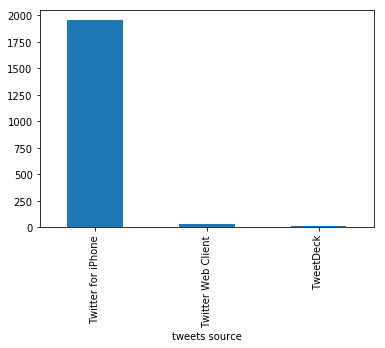

In [381]:
df_master.source.value_counts().plot(kind='bar')
plt.xlabel('tweets source')
plt.ylabel('tweets cpunt')
plt.title('Sources')

#plt.hist(df_master.source)

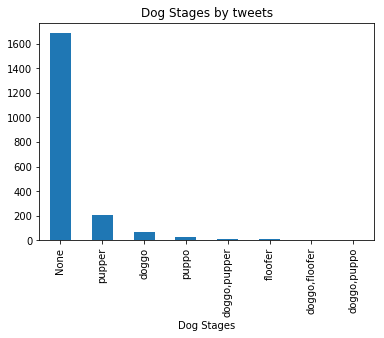

In [361]:
df_master.stage.value_counts().plot(kind='bar')
plt.title('Dog Stages by tweets')
plt.xlabel('Dog Stages');

In [362]:
df_master.stage.value_counts()

None             1688
pupper           203 
doggo            63  
puppo            22  
doggo,pupper     9   
floofer          7   
doggo,floofer    1   
doggo,puppo      1   
Name: stage, dtype: int64

In [363]:
df_master.groupby('stage')['retweet_count'].sum()

stage
None             4351592
doggo            448919 
doggo,floofer    3433   
doggo,pupper     36751  
doggo,puppo      19196  
floofer          34781  
pupper           479807 
puppo            142427 
Name: retweet_count, dtype: int64

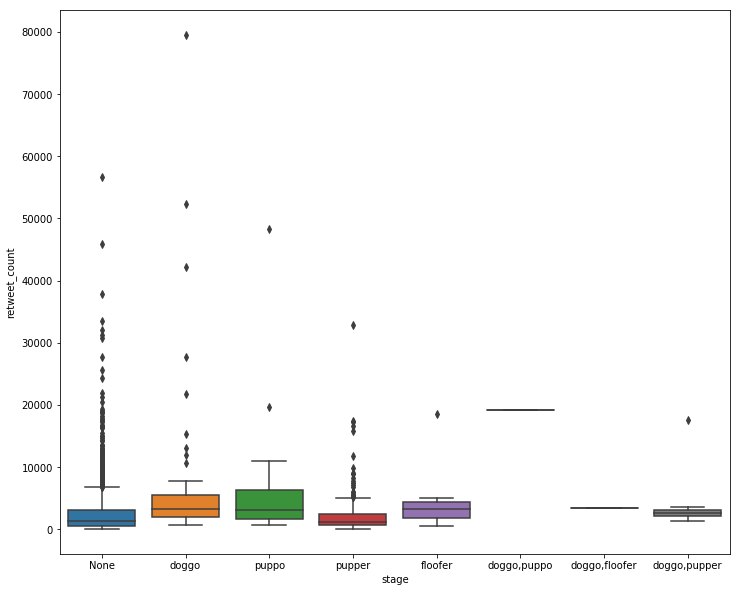

In [364]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.boxplot(x='stage',y='retweet_count', data=df_master);

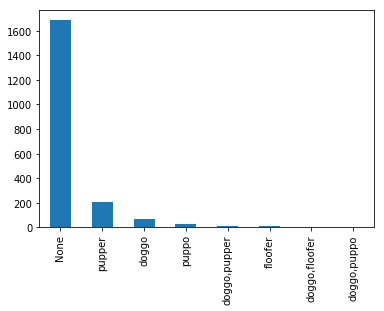

In [365]:
df_master['stage'].value_counts().plot(kind = 'bar')

(array([   6.,   10.,   34.,   33.,   33.,  147.,  152.,  823.,  456.,  297.]),
 array([ 0.  ,  0.14,  0.28,  0.42,  0.56,  0.7 ,  0.84,  0.98,  1.12,
         1.26,  1.4 ]),
 <a list of 10 Patch objects>)

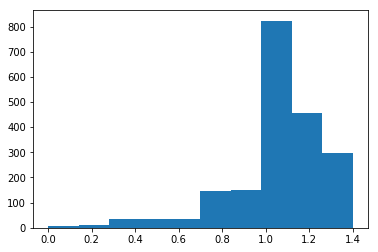

In [366]:
#discarding outliers
plt.hist(df_master[df_master.total_rating < 2].total_rating)

Text(0,0.5,'Count')

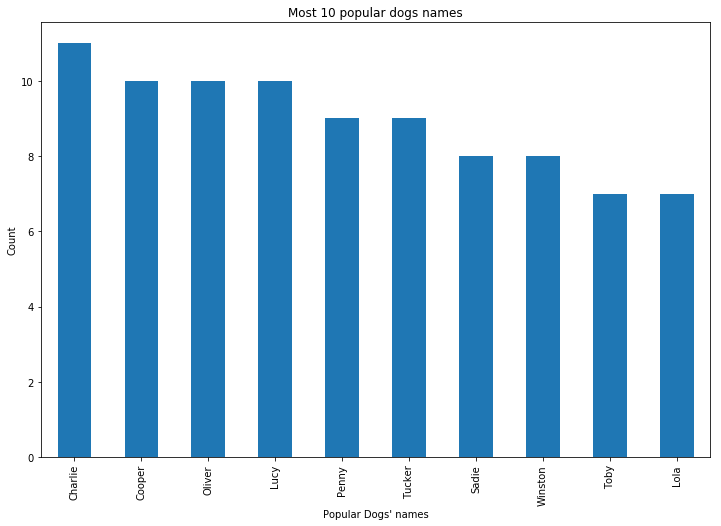

In [391]:
df_master.name.value_counts()[:10].plot('bar', figsize=(12,8), title='Most 10 popular dogs names')
plt.xlabel("Popular Dogs' names")
plt.ylabel("Count")

In [368]:
pd.set_option('display.max_columns', 1000)
df_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,stage,total_rating,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,2017-08-01 00:00:00,16:23:56,None,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,2017-08-01 00:00:00,00:17:27,None,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,2017-07-31 00:00:00,00:18:03,None,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,2017-07-30 00:00:00,15:58:51,None,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,2017-07-29 00:00:00,16:00:24,None,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,NaN,2017-07-29 00:00:00,00:08:17,None,1.3,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261,20562
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10,Jax,2017-07-28 00:00:00,16:27:12,None,1.3,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2158,12041
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10,NaN,2017-07-28 00:00:00,00:22:40,None,1.3,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,

In [369]:
df_prediction = df_master.query('p1_dog == True and p2_dog == True and p3_dog == True')
#len(df_prediction) / len(df_master)
df_prediction

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,stage,total_rating,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,2017-08-01 00:00:00,00:17:27,None,1.30,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,2017-07-31 00:00:00,00:18:03,None,1.20,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,2017-07-29 00:00:00,16:00:24,None,1.20,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10,NaN,2017-07-28 00:00:00,00:22:40,None,1.30,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16716,56848
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10,Zoey,2017-07-27 00:00:00,16:25:51,None,1.30,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4429,28226
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,10,Cassie,2017-07-26 00:00:00,15:59:51,doggo,1.40,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467
10,890006608113172480,2017-07-26 00:31:25,Twitter for iPhone,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,"https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1",13.0,10,Koda,2017-07-26 00:00:00,00:31:25,None,1.30,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,7624,31166
12,889665388333682689,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13.0,10,NaN,2017-07-25 00:00:00,01:55:32,pupp

In [370]:
df_prediction.p1.value_counts()[:10]

golden_retriever      119
Pembroke              77 
Labrador_retriever    75 
Chihuahua             50 
pug                   39 
Pomeranian            28 
malamute              26 
toy_poodle            26 
chow                  26 
Samoyed               25 
Name: p1, dtype: int64

In [371]:
df_prediction.p2.value_counts()[:10]

Labrador_retriever          70
Cardigan                    63
golden_retriever            54
Chihuahua                   32
Chesapeake_Bay_retriever    30
French_bulldog              30
Siberian_husky              30
Pomeranian                  27
beagle                      27
collie                      26
Name: p2, dtype: int64

In [372]:
df_prediction.p3.value_counts()[:10]

Labrador_retriever           62
Chihuahua                    48
golden_retriever             33
Eskimo_dog                   31
kelpie                       28
Staffordshire_bullterrier    27
Pekinese                     26
kuvasz                       25
cocker_spaniel               25
beagle                       24
Name: p3, dtype: int64

Text(0.5,0,'Dog Breed')

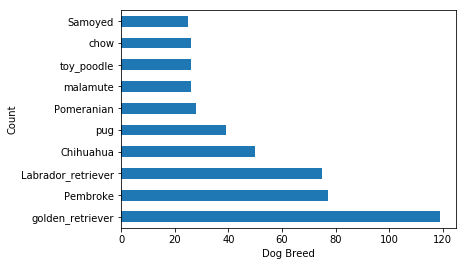

In [373]:

df_prediction['p1'].value_counts()[:10].plot(kind = 'barh')
plt.ylabel('Count')
plt.xlabel('Dog Breed')


Text(0.5,0,'rating')

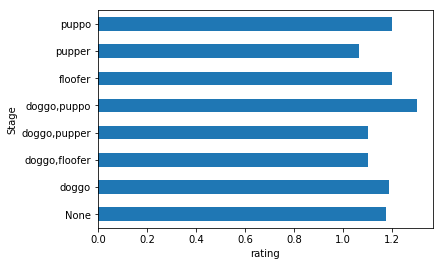

In [399]:
df_master.groupby('stage')['total_rating'].mean().plot(kind = 'barh')
plt.ylabel('Stage')
plt.xlabel('rating')

In [398]:
df_master.groupby('stage').total_rating.describe()

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
None,1688.0,1.175850,4.416838,0.0,1.000,1.1,1.2,177.6
doggo,63.0,1.188889,0.147135,0.8,1.100,1.2,1.3,1.4
"doggo,floofer",1.0,1.100000,NaN,1.1,1.100,1.1,1.1,1.1
"doggo,pupper",9.0,1.100000,0.239792,0.5,1.100,1.2,1.2,1.3
"doggo,puppo",1.0,1.300000,NaN,1.3,1.300,1.3,1.3,1.3
floofer,7.0,1.200000,0.115470,1.0,1.150,1.2,1.3,1.3
pupper,203.0,1.063680,0.172818,0.3,1.000,1.1,1.2,1.4
puppo,22.0,1.200000,0.130931,0.9,1.125,1.2,1.3,1.4


### Insights
- Twitter for iPhone is the most source for tweets with about 98 %
- Pupper dog is the most stage in tweets but Doggo is the most favorited tweet sum
- Charlie is the most popular dog name in dataset
- golden_retriever dog is the most dog appears in predictions that the image is for dog